In [1]:
import numpy as np
from scipy import integrate as integ
from turing_model import TuringModel as tm
from matplotlib import pyplot as plt
from scipy import signal as signal
from tqdm import tqdm

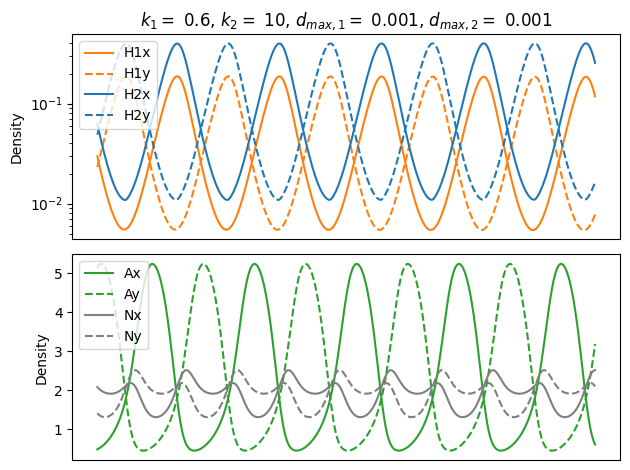

In [142]:
fig, (ax1,ax2)=plt.subplots(2)
#fig, (ax1,ax2,ax3)=plt.subplots(3)
#fig, ax1=plt.subplots()
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.30, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0, 0, 0]
start = 9500#9850#24850
end = 9800#25000

var = []
k_1 = 0.6
k_2 = 10
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
t_end = 10000
number_steps = 10000
t = np.linspace(0, t_end, number_steps)
var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

# ax1.plot(t[start:end], (var[start:end, 4]/(var[start:end, 4]+var[start:end, 5])), label="H1 flow",color="tab:red")
# ax1.plot(t[start:end], (var[start:end, 6]/(var[start:end, 6]+var[start:end, 7])), label="H2 flow",color="tab:red")
ax1.plot(t[start:end], var[start:end, 4], label="H1x",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="H1y",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="H2x",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="H2y",color="tab:blue", linestyle="--")
ax1.set_yscale("log")
# ax1.set_xlim(10005,10075)
ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max, 1} = $ " + str(d_Hmax1)+ ", $d_{max, 2} = $ " + str(d_Hmax2))
ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)
# ax1.yaxis.set_ticklabels([])
ax1.set_ylabel("Density")
ax1.legend(loc="upper left")
# ax1.set_ylim(10**-6, 10**0)
ax2.plot(t[start:end], var[start:end:, 2], label="Ax",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="Ay",color="tab:green", linestyle="--")
ax2.plot(t[start:end], var[start:end:, 0], label="Nx",color="tab:grey")
ax2.plot(t[start:end], var[start:end:, 1], label="Ny",color="tab:grey", linestyle="--")
ax2.get_xaxis().set_visible(False)
# ax2.get_yaxis().set_visible(False)
# ax2.get_xaxis().set_ticks([])
# ax2.get_yaxis().set_ticks([])
ax2.set_xlabel("Time")
ax2.set_ylabel("Density")
# ax2.set_xlim(10005,10075)
ax2.legend(loc="upper left")
# ax3.plot(t[start:end], var[start:end, 4]-var[start:end, 6], label="x",color="brown")
# ax3.plot(t[start:end], var[start:end, 5]-var[start:end, 7], label="y",color="brown", linestyle="--")
# ax3.set_xlabel("Time")
# ax3.set_ylabel("$H_1$ - $H_2$")
# ax3.legend()
# ax3.set_yscale("log")
plt.tight_layout()
#plt.savefig("output/kforsmalldmax/transition3.png")

In [143]:
F1_gx = var[start:end, 12]
F1_gy = var[start:end, 13]
F1_H1x = var[start:end, 4]
F1_H1y = var[start:end, 5]

F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

F2_gx = var[start:end, 14]
F2_gy = var[start:end, 15]
F2_H2x = var[start:end, 6]
F2_H2y = var[start:end, 7]

F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))
# np.mean(F1-F2)

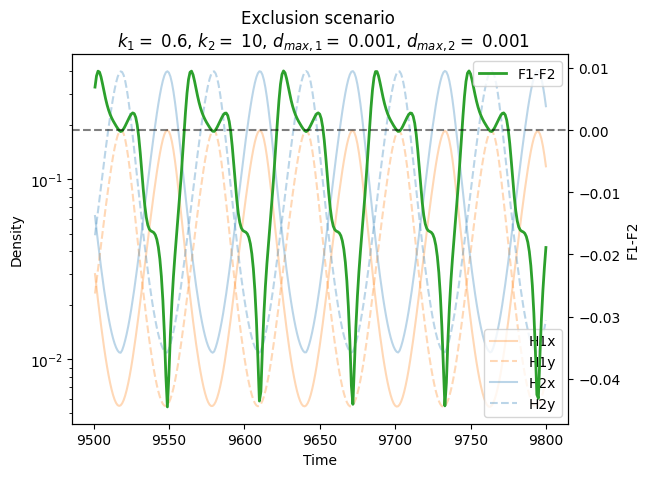

In [144]:
fig, ax1=plt.subplots(1)
ax1.plot(t[start:end], var[start:end, 4], label="H1x",color="tab:orange", alpha=0.3)
ax1.plot(t[start:end], var[start:end, 5], label="H1y",color="tab:orange", linestyle="--", alpha=0.3)
ax1.plot(t[start:end], var[start:end, 6], label="H2x",color="tab:blue", alpha=0.3)
ax1.plot(t[start:end], var[start:end, 7], label="H2y",color="tab:blue", linestyle="--", alpha=0.3)
ax1.set_yscale("log")
ax1.legend(loc="lower right")
ax1.set_title("Exclusion scenario \n $k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max, 1} = $ " + str(d_Hmax1)+ ", $d_{max, 2} = $ " + str(d_Hmax2))
#ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{Hmax} = $ " + str(d_Hmax1))
# plot F1-F2 on second y axis
ax2 = ax1.twinx()
# thicker than the other lines
ax2.plot(t[start:end], F1 - F2, label="F1-F2", color="tab:green", linewidth=2)
ax2.set_ylabel("F1-F2")
ax2.legend(loc="upper right")
# ax2.set_ylim(-0.075, 0.075)
# ax2.set_ylim(-0.06, 0.06)
# line at y = 0
ax2.axhline(0, color="black", alpha=0.5, linestyle="--")
ax1.set_xlabel("Time")
ax1.set_ylabel("Density")
plt.show()

In [146]:
def find_extrema(x,n):
    """ returns an array with n extreme values of x"""
    
    min_index = signal.argrelmin(x)[0]         # create array with indices of local minima of x
    max_index = signal.argrelmax(x)[0]         # create array with indices of local maxima of x
    
    ext_index = np.append(min_index,max_index) # array with indices of local extrema in x
    ext_index = np.sort(ext_index)             # sort array (alternating minima and maxima)
    extrema = x[ext_index]                     # array with the actual values of the extrema
       
    if len(extrema) == 0:                      # if all values in x are the same and no extremum is found:
        extrema = np.append(extrema,x[-1])     #   return last value of x in this case
    while len(extrema) < n:                    # if less than n extrema have been found:
        extrema = np.append(extrema,extrema[0])#   repeat last extremum until array has n elements
    while len(extrema) > n:                    # if more than n extrema have been found:
        extrema = np.delete(extrema,-1)        #   delete elements until arrays has n elements
        
    return extrema

In [4]:
# fitness difference as bifurcation parameter over k_1 and fixed k_2 
# k_2 in a region where it can either win or lose -> 10**1
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.3, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
start = 9000#24850
end = 10000#25000

var = []
k_1_range = np.geomspace(0.1, 10, 100)
k_2 = 10**1
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3


num_extr = 12 # set number of maxima to be found

Fdiff = []

var = []

i = 0

for k_1 in tqdm(k_1_range):
    #k_2 = k_1
    model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
    t_end = 10000
    number_steps = 10000
    t = np.linspace(0, t_end, number_steps)
    var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
    model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

    F1_gx = var[start:end, 12]
    F1_gy = var[start:end, 13]
    F1_H1x = var[start:end, 4]
    F1_H1y = var[start:end, 5]

    F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

    F2_gx = var[start:end, 14]
    F2_gy = var[start:end, 15]
    F2_H2x = var[start:end, 6]
    F2_H2y = var[start:end, 7]

    F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))

    Fdiff.append(find_extrema((F1-F2), num_extr))


    i += 1

100%|██████████| 100/100 [03:46<00:00,  2.27s/it]


(-0.06, 0.02)

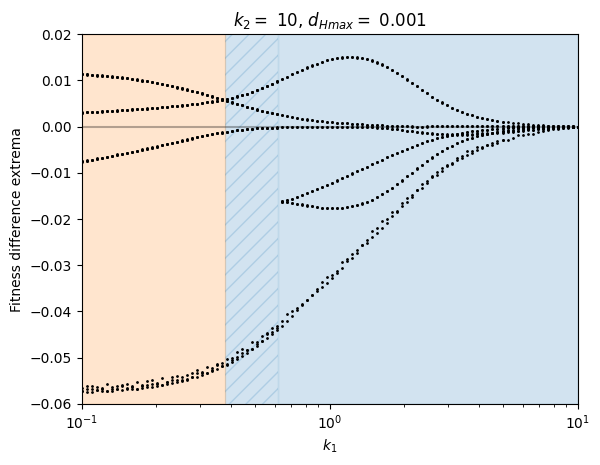

In [5]:
plt.plot(k_1_range, Fdiff, ".", markersize=2, color = "black")
plt.xscale("log")
plt.xlabel("$k_1$")
plt.ylabel("Fitness difference extrema")    
plt.title("$k_2 = $ " + str(k_2) + ", $d_{Hmax} = $ " + str(d_Hmax1))
# plt.axvline(k_2, color="black", linestyle="--", alpha=0.3)
plt.axhline(0, color="black", linestyle="-", alpha=0.3)
plt.axvspan(0, 0.38, alpha=0.2, color='tab:orange')
plt.axvspan(0.62, 10, alpha=0.2, color='tab:blue')
plt.xlim(10**-1, 10**1)
plt.fill_betweenx([-0.06, 0.02], 0.38, 0.62, alpha=0.2, color='tab:blue', hatch='//', edgecolor="none")
plt.ylim(-0.06, 0.02)


In [ ]:
# fitness difference as bifurcation parameter over k_1 and fixed k_2 
# k_2 in a region where it can either win or lose -> 10**1
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.3, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
start = 9000#24850
end = 10000#25000

var = []
k_1_range = np.geomspace(0.369,0.372, 100)
k_2 = 10**1
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3


num_extr = 12 # set number of maxima to be found

Fdiff = []


var = []

i = 0

for k_1 in tqdm(k_1_range):
    #k_2 = k_1
    model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
    t_end = 10000
    number_steps = 10000
    t = np.linspace(0, t_end, number_steps)
    var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
    model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

    F1_gx = var[start:end, 12]
    F1_gy = var[start:end, 13]
    F1_H1x = var[start:end, 4]
    F1_H1y = var[start:end, 5]

    F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

    F2_gx = var[start:end, 14]
    F2_gy = var[start:end, 15]
    F2_H2x = var[start:end, 6]
    F2_H2y = var[start:end, 7]

    F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))

    Fdiff.append(find_extrema((F1-F2), num_extr))

    i += 1

(0.0055, 0.006)

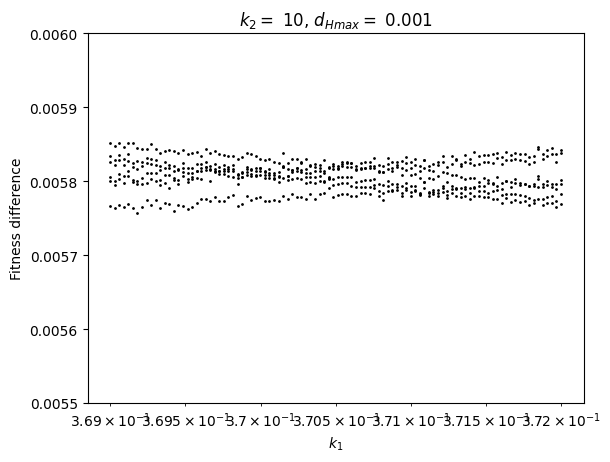

In [38]:
plt.plot(k_1_range, Fdiff, ".", markersize=2, color = "black")
plt.xscale("log")
plt.xlabel("$k_1$")
plt.ylabel("Fitness difference")    
plt.title("$k_2 = $ " + str(k_2) + ", $d_{Hmax} = $ " + str(d_Hmax1))
# plt.axvline(k_2, color="black", linestyle="--", alpha=0.3)
plt.axhline(0, color="black", linestyle="-", alpha=0.3)
plt.ylim(0.0055,0.006)
# plt.xlim(0.368,0.374)

In [148]:
# fitness difference as bifurcation parameter over k_1 and fixed k_2 
# k_2 in a region where it can either win or lose -> 10**1
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.3, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
start = 195000#24850
end = 200000#25000

var = []
k_1_range = np.geomspace(0.1, 10, 100)
k_2 = 10**1
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3


num_extr = 12 # set number of maxima to be found

H1x_extr = []
H1y_extr = []
H2x_extr = []
H2y_extr = []


var = []

i = 0

for k_1 in tqdm(k_1_range):
    #k_2 = k_1
    model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
    t_end = 200000
    number_steps = 200000
    t = np.linspace(0, t_end, number_steps)
    var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
    model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

    H1x_extr.append(find_extrema((var[start:end,4]),num_extr))
    H1y_extr.append(find_extrema((var[start:end,5]),num_extr))
    H2x_extr.append(find_extrema((var[start:end,6]),num_extr))
    H2y_extr.append(find_extrema((var[start:end,7]),num_extr))


    i += 1

100%|██████████| 100/100 [48:04<00:00, 28.85s/it]


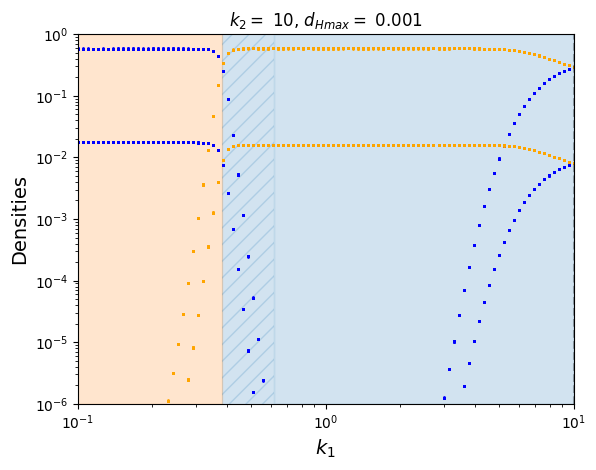

In [150]:
plt.plot(k_1_range, H1x_extr, ".", markersize=2, color = "blue")
plt.plot(k_1_range, H1y_extr, ".", markersize=2, color = "blue")
plt.plot(k_1_range, H2x_extr, ".", markersize=2, color = "orange")
plt.plot(k_1_range, H2y_extr, ".", markersize=2, color = "orange")
plt.xscale("log")
plt.xlabel("$k_1$", fontsize=14)
plt.ylabel("Densities", fontsize=14) 
plt.title("$k_2 = $ " + str(k_2) + ", $d_{Hmax} = $ " + str(d_Hmax1))
plt.axvline(k_2, color="black", linestyle="--", alpha=0.3)
plt.axhline(0, color="black", linestyle="-", alpha=0.3)
plt.axvspan(0, 0.38, alpha=0.2, color='tab:orange')
plt.axvspan(0.62, 10, alpha=0.2, color='tab:blue')
plt.xlim(10**-1, 10**1)
plt.fill_betweenx([0, 10**1], 0.38, 0.62, alpha=0.2, color='tab:blue', hatch='//', edgecolor="none")
plt.ylim(10**-6, 1)
plt.yscale("log")